# 80 tRNA chart with R²

In [32]:
import pickle as pkl
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
import shelve
#import dbm.gnu

from statsmodels.nonparametric.smoothers_lowess import lowess

Add translation to the `sys.path`:

In [9]:
import sys
sys.path.append(r'../')
sys.path.append(r'../translation/')

In [5]:
filepath = "../results/updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah_20160906_1752_3600s.p"

In [10]:
results = pkl.load(open(filepath, "rb"), encoding='latin1')

In [30]:
filepath = "../results/ribosome_timecourses_updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah_20160906_1753.db"
d = shelve.open(filepath)

error: db type is dbm.gnu, but the module is not available

In [20]:
transcriptome = pkl.load(open('../parameters/transcriptome_shah.p', "rb"), encoding='latin1')

In [21]:
ribo_lattice_dict = {}

for mRNA in results['transcriptome']:
    n_nucleotides = len(mRNA.sequence)
    last_polysome = d['mRNA_'+str(mRNA.index).zfill(5)][-1]  # we look at last to catch steady state
    # Select only every third element (the others are zero anyway):
    ribos = np.array([1 if pos in last_polysome else 0 for pos in range(0, n_nucleotides, 3)])
    
    if mRNA.geneID in ribo_lattice_dict:  # if this gene has been encountered before
        ribo_lattice_dict[mRNA.geneID] += ribos
    else:                                 # if this gene is new
        ribo_lattice_dict[mRNA.geneID] = ribos

KeyError: b'mRNA_00000'

In [14]:
# length of longest polysome in codons
max_codons = len(max(ribo_lattice_dict.values(), key=len))

# fill up with None values
for gene in ribo_lattice_dict:
    ribo_lattice_dict[gene] = np.append(ribo_lattice_dict[gene], \
                                        [None] * (max_codons - len(ribo_lattice_dict[gene])))

NameError: name 'ribo_lattice_dict' is not defined

In [13]:
ribo_lattice_df = pd.DataFrame.from_dict(ribo_lattice_dict)

NameError: name 'ribo_lattice_dict' is not defined

In [12]:
ribo_lattice_df_normalized = pd.DataFrame()

for column in ribo_lattice_df:
    ribo_lattice_df_normalized[column] = ribo_lattice_df[column]/float(transcriptome[column])

NameError: name 'ribo_lattice_df' is not defined

NameError: name 'ribo_lattice_df_normalized' is not defined

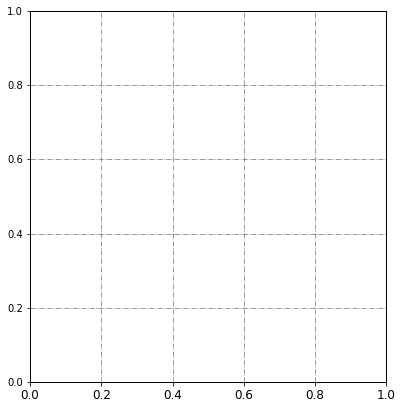

In [11]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.linestyle']='-.'
plt.rcParams['grid.color']='grey'

hfont = {'fontname':'FreeSans'}

fig = plt.figure()
fig.subplots_adjust(wspace=0.35)
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['ytick.labelsize'] = 10

####################################################################
ax = fig.add_subplot(221, facecolor='white')

ax.plot(ribo_lattice_df_normalized["YIL133C"], color='navy')
ax.set_xlabel('Codon position', fontsize=fontsize, **hfont)
ax.set_ylabel('Ribosome density', fontsize=fontsize, **hfont)
plt.setp(ax.get_xticklabels(), fontsize=fontsize, **hfont)
plt.setp(ax.get_yticklabels(), fontsize=fontsize, **hfont)
ax.set_title("YIL133C", **hfont)
        
plt.text(-45, 0.103, r'\textbf{A}', fontsize=16, weight="bold", **hfont)

####################################################################
ax = fig.add_subplot(222, facecolor='white')

# make a horizontal bar chart
val = counter.values()    # the bar lengths
pos = np.arange(len(counter))+.5    # the bar centers on the y axis

plt.barh(pos, val, align='center', color='navy')
plt.yticks(pos, counter.keys())
plt.xlabel('Counts per anticodon at peak', fontsize=fontsize, **hfont)
plt.ylabel('Anticodons', fontsize=fontsize, **hfont)
plt.setp(ax.get_xticklabels(), fontsize=fontsize, **hfont)
plt.setp(ax.get_yticklabels(), fontsize=fontsize - 5, **hfont)
plt.grid(True)

plt.text(-300, 43, r'\textbf{B}', fontsize=16, weight="bold", **hfont)

####################################################################
ax = fig.add_subplot(223, facecolor='white')

dict1 = anticodon_tRNA_abundancy
dict2 = counter
xaxislabel = "Anticodon tRNA abundancy"
yaxislabel = "Peak counts"
fontsize = 16
alpha = 0.7


plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
xs = [dict1[key] for key in plotkeys]
ys = [dict2[key] for key in plotkeys] 

ax.grid(True, linestyle = '-.')
ax.set_xscale('log')
ax.set_yscale('log')
if xaxislabel:
    ax.set_xlabel(xaxislabel, **hfont)
    if fontsize:
        ax.set_xlabel(xaxislabel, fontsize=fontsize, **hfont)
        plt.setp(ax.get_xticklabels(), fontsize=fontsize, **hfont)
if yaxislabel:
    ax.set_ylabel(yaxislabel, **hfont)
    if fontsize:
        ax.set_ylabel(yaxislabel, fontsize=fontsize, **hfont)
        plt.setp(ax.get_yticklabels(), fontsize=fontsize, **hfont)

scat = plt.scatter(xs, ys, s=60, color='navy')
scat.set_alpha(alpha)

points = zip(xs, ys)
sorted_points = sorted(points)
new_xs = [point[0] for point in sorted_points]
new_ys = [point[1] for point in sorted_points]
ylowess = lowess(new_ys, new_xs)[:,1]
plt.plot(new_xs, ylowess, 'darkred', linewidth=4)
plt.xlim([1e4, 2e5])
plt.ylim([1e2, 3e3])

plt.text(6.5e3, 3e3, r'\textbf{C}', fontsize=16, weight="bold", **hfont)

####################################################################
ax = fig.add_subplot(224, facecolor='white')

dict1 = anticodon_tRNA_abundancy
dict2 = anticodon_demand_transcriptome
xaxislabel = "Anticodon tRNA abundancy"
yaxislabel = "Anticodon demand in transcriptome"
fontsize=16
alpha = 0.7


plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
xs = [dict1[key] for key in plotkeys]
ys = [dict2[key] for key in plotkeys] 

ax.grid(True, linestyle = '-.')
ax.set_xscale('log')
ax.set_yscale('log')
if xaxislabel:
    ax.set_xlabel(xaxislabel, **hfont)
    if fontsize:
        ax.set_xlabel(xaxislabel, fontsize=fontsize, **hfont)
        plt.setp(ax.get_xticklabels(), fontsize=fontsize, **hfont)
if yaxislabel:
    ax.set_ylabel(yaxislabel, **hfont)
    if fontsize:
        ax.set_ylabel(yaxislabel, fontsize=fontsize, **hfont)
        plt.setp(ax.get_yticklabels(), fontsize=fontsize, **hfont)

scat = plt.scatter(xs, ys, s=60, color='navy')
scat.set_alpha(alpha)

points = zip(xs, ys)
sorted_points = sorted(points)
new_xs = [point[0] for point in sorted_points]
new_ys = [point[1] for point in sorted_points]
ylowess = lowess(new_ys, new_xs)[:,1]
plt.plot(new_xs, ylowess, 'darkred', linewidth=4)
plt.xlim([1e4, 2e5])
plt.ylim([1e4, 2e6])

plt.text(6.5e3, 2e6, r'\textbf{D}', fontsize=16, weight="bold", **hfont)

plt.savefig('ribosome_stalling.pdf', bbox_inches='tight')